<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Optimization Practical Assignment (20 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this notebook you will learn to implement gradient descent algorithm. we will use 3 functions and run gradient descent on each and try to visualise the algorithm with different learning rates.

In [1]:
# do not import other packages for this assignment
import numpy as np
from matplotlib import pyplot as plt

# 1-implement functions and their derivative

the three functions we are going to use are as follow:

a)
$f_1(x) = x\sin(\frac{\pi x}{40}) - \frac{x}{500} \quad $ where $\quad x \in [35, 80]$
<br/>
b)
$f_2(x) = \sin^2(\frac{\pi x}{50}) + \cos(\frac{\pi x}{50} - 2) \quad $ where $\quad x \in [5, 50]$
<br/>
c)
$f_3(x) = x\sin(x) \quad $ where $\quad x \in [400, 1500]$

use the numpy library mathematic function in order to make the functions vectorized.

In [106]:
# 3 points

def f1(x):
    return x*np.sin(np.pi*x/40)-x/500

def f2(x):
    return np.sin(np.pi*x/50)**2+np.cos(np.pi*x/50-2)

def f3(x):
    return x*np.sin(np.pi*x/90)

run the code block below to plot the three functions.

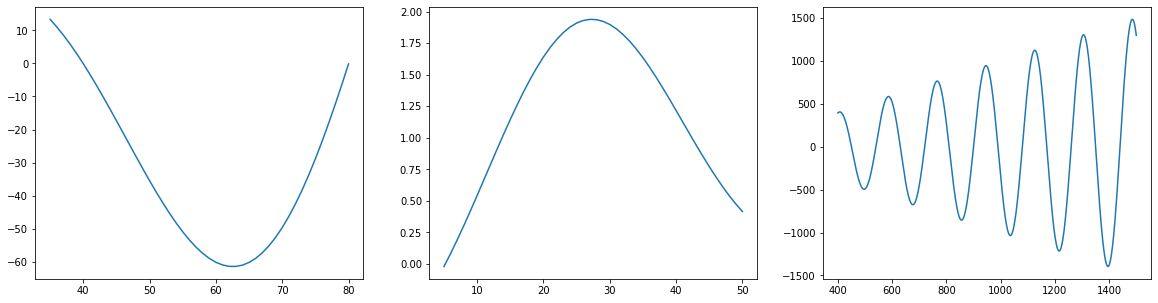

In [107]:
f1_range = np.arange(35, 81)
f2_range = np.arange(5, 51)
f3_range = np.arange(400, 1501)

fig, axs = plt.subplots(1,3,figsize=(20, 5))
axs[0].plot(f1_range, f1(f1_range))
axs[1].plot(f2_range, f2(f2_range))
axs[2].plot(f3_range, f3(f3_range))

array([-1.87781495, -1.92638317, -1.9630746 , -1.98766302, -1.99999683,
       -2.        , -1.9876725 , -1.96309035, -1.92640508, -1.87784289,
       -1.81770318, -1.74635672, -1.66424339, -1.57186944, -1.4698044 ,
       -1.35867753, -1.23917395, -1.11203046, -0.97803093, -0.83800151,
       -0.69280554, -0.54333818, -0.39052097, -0.23529607, -0.07862049,
        0.07853982,  0.2352159 ,  0.39044179,  0.54326048,  0.69272979,
        0.83792819,  0.97796049,  1.11196333,  1.23911055,  1.35861824,
        1.4697496 ,  1.57181946,  1.66419853,  1.74631727,  1.81766938,
        1.87781495,  1.92638317,  1.9630746 ,  1.98766302,  1.99999683,
        2.        ])

write your answer to these questions on the next cell.  
Q1) which of these functions are convex or concave?  
Q2) can gradient descent be used to find the maximum of the second function?

<font color=red>
(4 points)    
<br/>
Q1 - Non of these functions are convex. For $f_2$ and $f_3$ this fact can be deduced by trying to find a line
    between two points which lies under the function's epigraph.
    At first sight we might think $f_1$ is convex but if we look closer at the beginning of the x domain there is a concavity apparent. Moreover to make sure
    we compute the second derivative of $f_1$ and we calculate the values of second derivative in x domain.
    It is a fact that If $f(x)$ has a second derivative in $[a,b]$, then a necessary and sufficient condition for it to be convex on that interval is that the second derivative $f^{''}(x)>=0$ for all x in $[a,b]$.
    In the code below we compute the second derivative of $f_1$ and we see that some points at the start of the x domain
    have negative value so $f_1$ is not a convex function.
<br/>
Q2 -Generally speaking, gradiant descent can't be used on a concave function because doing so leads to a local maximum.     However since here the local maximum point is the maximum of the function in it's interval, this algorithm leads to the right answer for the maximum point of $f_2$. 
</font>

In [90]:
x=np.arange(35,81)
f_2=2*np.cos(np.pi/40*x)-np.pi/40*np.sin(np.pi/40*x)
f_2

array([-1.87781495, -1.92638317, -1.9630746 , -1.98766302, -1.99999683,
       -2.        , -1.9876725 , -1.96309035, -1.92640508, -1.87784289,
       -1.81770318, -1.74635672, -1.66424339, -1.57186944, -1.4698044 ,
       -1.35867753, -1.23917395, -1.11203046, -0.97803093, -0.83800151,
       -0.69280554, -0.54333818, -0.39052097, -0.23529607, -0.07862049,
        0.07853982,  0.2352159 ,  0.39044179,  0.54326048,  0.69272979,
        0.83792819,  0.97796049,  1.11196333,  1.23911055,  1.35861824,
        1.4697496 ,  1.57181946,  1.66419853,  1.74631727,  1.81766938,
        1.87781495,  1.92638317,  1.9630746 ,  1.98766302,  1.99999683,
        2.        ])

# 2-implement gradient descent

complete the code below to implement gradient descent. in order to implement gradient descent you need to compute the derivatives. However, you dont have to compute the exact derivative terms and can instead use the numerical formula below to approximate it.

\begin{align}
    f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}
\end{align}    

In [101]:
# 5 points
def gradient_descent(func, initial_point, learning_rate=0.1, num_iter=800):
    '''
    Inputs:
    - func          : function that we want to run gradient descent on. with type python function
    - initial_point : numpy array containing the initial points of the variable, of shape (1)
    - learning_rate : gradient descent learning parameter
    - num_iter      : number of iterations to run gradient descent
    
    Outputs:
    - results       : numpy array containing points at each time step, of shape (num_iter+1, 1)
    '''
    
    num_variables = 1
    results = np.zeros((num_iter+1, num_variables))
    iteration = 0
    x = initial_point
    results[0] = x
    
    while iteration < num_iter:
        x-=(func(x+0.001)-func(x-0.001))/(2*0.001)*learning_rate
        iteration += 1
        results[iteration]=x
    
    print(f'gradient descent found {func(x)[0]} as the minimum of the function on point {x}')
    
    return results

lets run gradient descent on the first function and see the result.

In [102]:
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=0.1)

gradient descent found -61.424852501993314 as the minimum of the function on point [62.56144043]


Now we will visualize each step of gradient descent with the help of the next function.

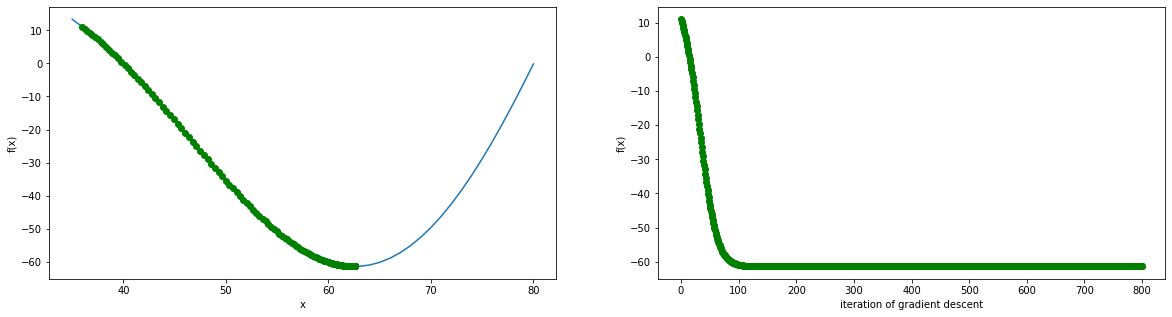

In [103]:
def plot_gradient_descent1D(func, x_range, results):
    fig, axs = plt.subplots(1,2,figsize=(20, 5))
    # see x through each step of gradient descent
    axs[0].plot(x_range, func(x_range))
    axs[0].plot(results, func(results), 'og-')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')
    # see y though each step of gradient descent
    axs[1].plot(np.arange(0, len(results)), func(results), 'og-')
    axs[1].set_xlabel('iteration of gradient descent')
    axs[1].set_ylabel('f(x)')

plot_gradient_descent1D(f1, f1_range, results)

now lets try different values for the learning rate and see the results.

gradient descent found -58.63364218856887 as the minimum of the function on point [66.20261191]


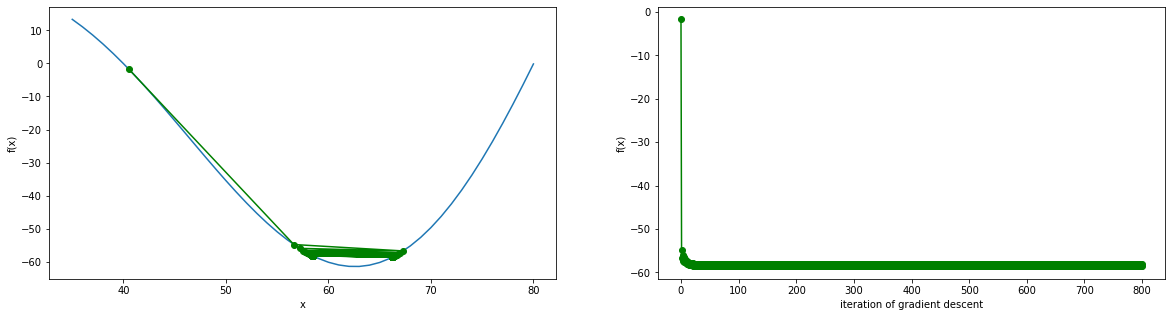

In [104]:
# learning rate = 5
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=5)
plot_gradient_descent1D(f1, f1_range, results)

gradient descent found -36.41627274106216 as the minimum of the function on point [50.27686967]


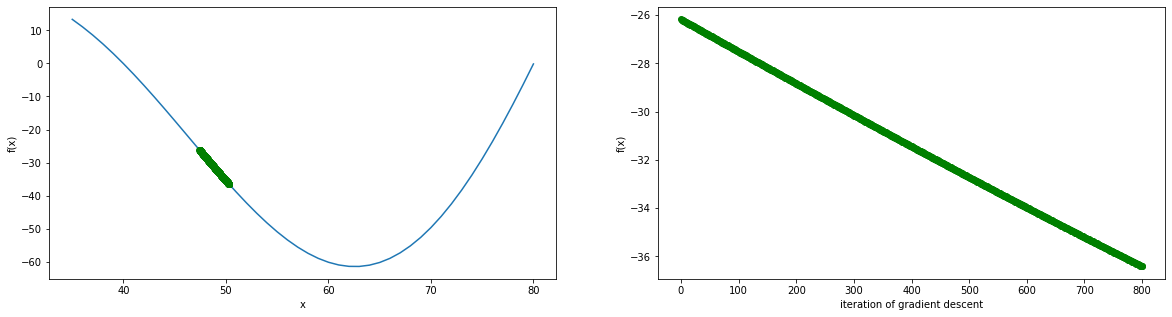

In [105]:
# learning rate = 0.001
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=0.001)
plot_gradient_descent1D(f1, f1_range, results)

write your answer to this question on the next cell.   
what happened when we set the learning rate to 5?   
what happened when we set the learning rate to 0.001?   

<font color=red>
(4 points)    
<br/>
Q1 - When we set the learning rate to 5 because 5 is a large learning rate, during the gradiant descent algorithm x keeps fluctuating around the minimum point and is never able to get near the minumum point as it takes large steps at each iteration.
<br/>
Q2 - On the other hand, when the learning rate is set to a small value such as 0.001 the jump steps are really short and hence the algorithm can find the minimum point nearly after a lot of iterations. In this case because the iteration number is not big enough, the output point is far away from the actual minimum point.  
</font>

Now let try to run gradient descent on the third function and see what happens. be sure to run the next cell multiple times to see how the random initial point will impact the final result.

gradient descent found -675.6069269648034 as the minimum of the function on point [676.21294796]


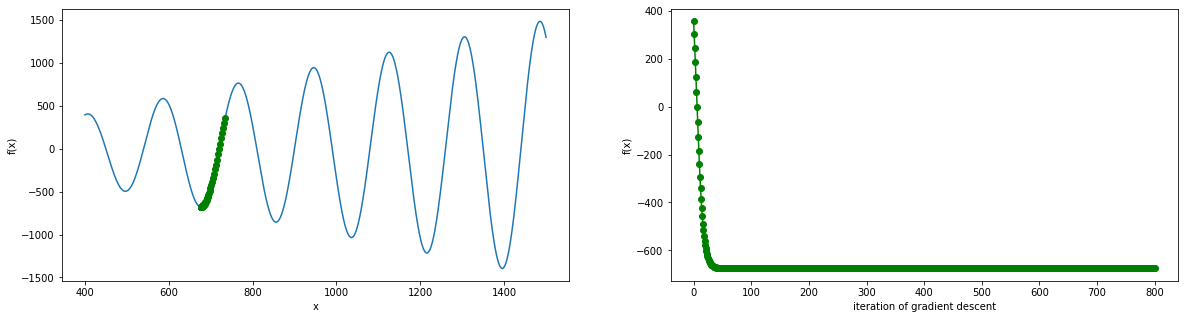

In [110]:
results = gradient_descent(f3, np.random.uniform(500,1000,1), learning_rate=0.1)
plot_gradient_descent1D(f3, f3_range, results)

# 3-implement gradient descent for two-dimensional functions

In this part you will implement gradient descent for a two dimensional function. the function we are going to use is as follows:

$f(x_1,x_2) = -\exp(-\frac{x_1^2+x_2^2}{2}) \quad $ where $\quad x_1,x_2 \in [-2, 2]*[-2, 2]$

implement the needed functions in the next cell.

In [158]:
# 4 points

def f(x1, x2):
    return -np.e**(-(x1**2+x2**2)/2)
def f_prime(x1,x2):
    return np.array([x1*np.e**(-(x1**2+x2**2)/2),x2*np.e**(-(x1**2+x2**2)/2)])

def gradient_descent_2d(func, initial_point, learning_rate=0.1, num_iter=50):
    '''
    Inputs:
    - func          : 2D function that we want to run gradient descent on. with type python function
    - initial_point : numpy array containing the initial points of the variable, of shape (2,)
    - learning_rate : gradient descent learning parameter
    - num_iter      : number of iterations to run gradient descent
    
    Outputs:
    - results       : numpy array containing points at each time step, of shape (num_iter+1, 2)
    '''
    x=initial_point
    iteration=0
    results=np.zeros((num_iter+1,2))
    results[0]=x
    while iteration<num_iter:
        x-=f_prime(x[0],x[1])*learning_rate
        iteration+=1
        results[iteration]=x
    print(f'gradient descent found {func(x[0],x[1])} as the minimum of the function on point {x}')
    return results

In [159]:
results = gradient_descent_2d(f, np.random.uniform(-2,2,2),num_iter=50)

gradient descent found -0.9996303104612888 as the minimum of the function on point [-0.00169251  0.02714132]


we will visualize this 2d function using contours plot.

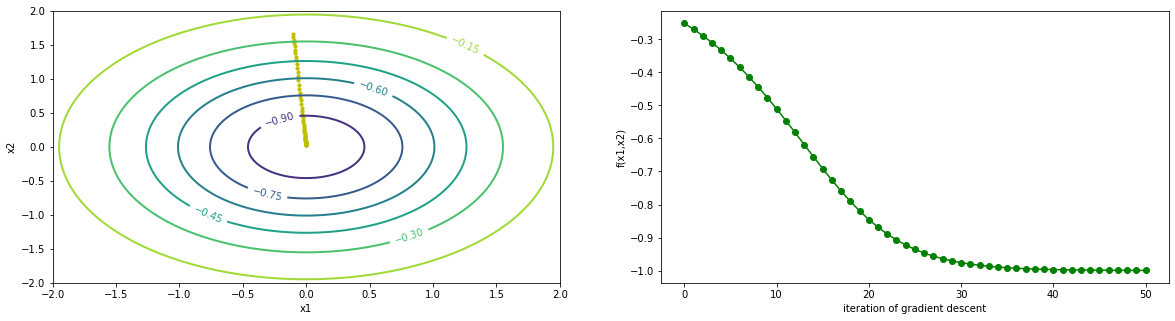

In [160]:
def contour_plot(func, results):
    fig, axs = plt.subplots(1,2,figsize=(20, 5))
    # see x through each step of gradient descent
    x1, x2 = np.meshgrid(np.linspace(-2.0, 2, 200), np.linspace(-2, 2, 200))
    y = func(x1, x2)
    cp = axs[0].contour(x1, x2, y, linewidths=2)
    axs[0].clabel(cp, inline=1, fontsize=10)
    axs[0].scatter(results[:,0], results[:,1], s=10, c="y")
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    # see y though each step of gradient descent
    axs[1].plot(np.arange(0, len(results)), func(results[:,0],results[:,1]), 'og-')
    axs[1].set_xlabel('iteration of gradient descent')
    axs[1].set_ylabel('f(x1,x2)')
    
    

contour_plot(f, results)